## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_pharmaceuticals_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
combined_pharmaceuticals_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mice_count = (combined_pharmaceuticals_df["Mouse ID"].value_counts())
mice_count


g989    13
e213    10
s710    10
c302    10
c758    10
        ..
o848     1
v199     1
h428     1
t573     1
f932     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = combined_pharmaceuticals_df[combined_pharmaceuticals_df.duplicated()]
duplicate_mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = combined_pharmaceuticals_df.drop(combined_pharmaceuticals_df.loc[combined_pharmaceuticals_df['Mouse ID'] =="g989"].index)
clean_mice_df

clean_mice_count = (clean_mice_df["Mouse ID"].value_counts())
clean_mice_count

j365    10
w422    10
c758    10
q787    10
g497    10
        ..
h428     1
t573     1
l872     1
n482     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

In [7]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(clean_mice_df["Mouse ID"].value_counts())
mice_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_groupby_df = clean_mice_df.groupby(["Drug Regimen"])
mean_tumor_volume = regimen_groupby_df["Tumor Volume (mm3)"].mean()
median_tumor_volume = regimen_groupby_df["Tumor Volume (mm3)"].median()
tumor_volume_variance = regimen_groupby_df["Tumor Volume (mm3)"].var()
tumor_volume_std = regimen_groupby_df["Tumor Volume (mm3)"].std()
tumor_volume_sem = regimen_groupby_df["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_stats_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume, "Median Tumor Volume": median_tumor_volume, "Tumor Volume Variance": tumor_volume_variance, "Tumor Volume Standard Deviation": tumor_volume_std, "Tumor Volume SEM": tumor_volume_sem})
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

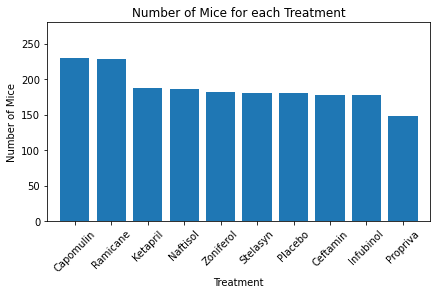

In [40]:
#create a count of mice that takes each drug
mice_drug_count = clean_mice_df["Drug Regimen"].value_counts()
mice_drug_count
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

treated_mice_df = mice_drug_count.plot(kind='bar', title='Number of Mice for each Treatment', rot=45, position=0.5)
plt.tight_layout()
plt.xlabel("Treatment")
plt.ylabel("Number of Mice")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice_drug_count+50))
plt.bar(x_axis, mice_drug_count, align ="center") 
plt.show()

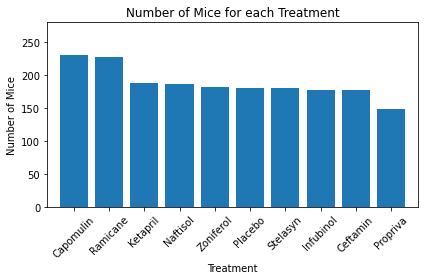

In [37]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mice_drug_count))

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Infubinol", "Ceftamin", "Propriva"])
plt.xticks(rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25) 
plt.ylim(0, max(mice_drug_count+50))
plt.bar(x_axis, mice_drug_count, align ="center")

plt.title("Number of Mice for each Treatment")
plt.xlabel("Treatment")
plt.ylabel("Number of Mice")
plt.tight_layout()
plt.show()


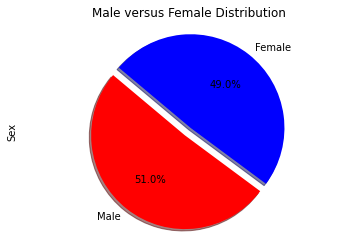

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_count = len(clean_mice_df.loc[clean_mice_df["Sex"] == "Male"])
female_count = len(clean_mice_df.loc[clean_mice_df["Sex"] == "Female"])

mouse_count = clean_mice_df["Sex"].value_counts()
male_female_df = pd.DataFrame([male_count], [female_count], ["Sex"])

labels = ["Male", "Female"]
sizes = [male_count, female_count]
colors = ["red", "blue"]
explode = (0.1, 0)

mouse_count.plot(kind="pie", title='Male versus Female Distribution', explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()


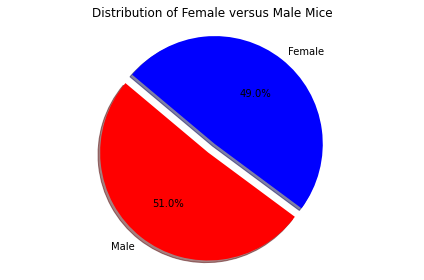

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
sizes = [male_count, female_count]
colors = ["red", "blue"]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Distribution of Female versus Male Mice")
plt.tight_layout()
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mice_df.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_merge = pd.merge(last_timepoint, clean_mice_df, how="left", on=["Mouse ID", "Timepoint"])
mouse_volume = tumor_merge[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]

#Capomulin 
capomulin_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Capomulin", :]
#Ramicane 
ramicane_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Ramicane", :]
#Infubinol
infubinol_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Infubinol", :]
#Ceftamin
ceftamin_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Ceftamin", :]
mouse_volume

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a262,Placebo,45,70.717621
3,a275,Ceftamin,45,62.999356
4,a366,Stelasyn,30,63.440686
...,...,...,...,...
243,z435,Propriva,10,48.710661
244,z578,Ramicane,45,30.638696
245,z581,Infubinol,45,62.754451
246,z795,Naftisol,45,65.741070


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

# For loop
for treatment in treatments:
    tumor_volume = mouse_volume.loc[mouse_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    tumor_volume_data.append(tumor_volume)
    
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"Values below {lower_bound} could be outliers for {treatment}.")
    print(f"Values above {upper_bound} could be outliers for {treatment}.")

    print(f"The lower quartile of tumor volume after {treatment} is: {lowerq}")
    print(f"The upper quartile of tumor volume after {treatment} is: {upperq}")
    print(f"The interquartile range of tumor volumes after {treatment} is: {iqr}")
    print(f"The the median of tumor volume after {treatment} is: {quartiles[0.5]}")

Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.
The lower quartile of tumor volume after Capomulin is: 32.37735684
The upper quartile of tumor volume after Capomulin is: 40.1592203
The interquartile range of tumor volumes after Capomulin is: 7.781863460000004
The the median of tumor volume after Capomulin is: 38.125164399999996
Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers for Ramicane.
The lower quartile of tumor volume after Ramicane is: 31.56046955
The upper quartile of tumor volume after Ramicane is: 40.65900627
The interquartile range of tumor volumes after Ramicane is: 9.098536719999998
The the median of tumor volume after Ramicane is: 36.56165229
Values below 36.83290494999999 could be outliers for Infubinol.
Values above 82.74144559000001 could be outliers for Infubinol.
The lower quartile of tumor volume after Infubinol is: 54.04860769
The uppe

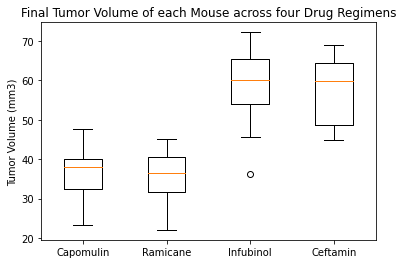

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of each Mouse across four Drug Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_volume_data, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

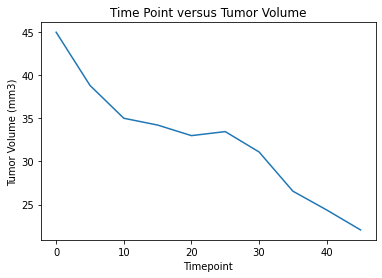

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_tumor = clean_mice_df.loc[clean_mice_df["Mouse ID"] == "k403"]
plt.title("Time Point versus Tumor Volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(mouse_tumor["Timepoint"], mouse_tumor["Tumor Volume (mm3)"])

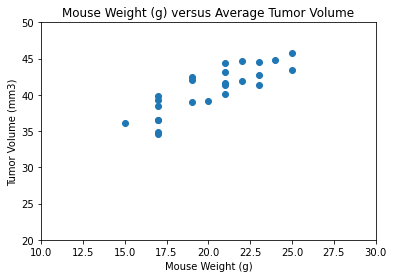

In [33]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_limit = 30
capomulin_average = capomulin_df.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.title("Mouse Weight (g) versus Average Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(20 ,50)
plt.xlim(10, x_limit)
plt.show()

## Correlation and Regression

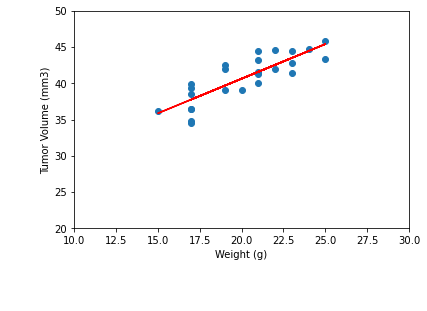

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])[0],2)
x_limit = 30
x_values =capomulin_average["Weight (g)"]
y_values = capomulin_average["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.ylim(20 ,50)
plt.xlim(10, x_limit)
plt.show()
plt.show()